In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import itertools
from collections import Counter
%matplotlib inline

In [3]:
train_data = pd.read_json('data/train.json')

# High Level Description of Data

In [3]:
train_data.shape

(49352, 15)

In [4]:
train_data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [5]:
print 'Columns in training data:'
for column in train_data.columns.values:
    print column, type(train_data[column].values[0])

Columns in training data:
bathrooms <type 'numpy.float64'>
bedrooms <type 'numpy.int64'>
building_id <type 'unicode'>
created <type 'unicode'>
description <type 'unicode'>
display_address <type 'unicode'>
features <type 'list'>
interest_level <type 'unicode'>
latitude <type 'numpy.float64'>
listing_id <type 'numpy.int64'>
longitude <type 'numpy.float64'>
manager_id <type 'unicode'>
photos <type 'list'>
price <type 'numpy.int64'>
street_address <type 'unicode'>


In [6]:
print 'Number of null values present in training data: {}'.format(train_data.isnull().sum().sum())

Number of null values present in training data: 0


In [7]:
train_data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [4]:
# Making a copy of our train_data dataframe and splitting into X and y
X_train = train_data[[x for x in train_data.columns.values if x != 'interest_level']].copy()
y_train = train_data['interest_level'].copy()

In [5]:
# Define function which will separate out by interest, so we can add features to X_train, y_train
# and just update sub-df's as needed by overwriting them
def separate_by_interest(X_train, y_train):
    X_low = X_train[y_train=='low']
    y_low = y_train[y_train=='low']

    X_med = X_train[y_train=='medium']
    y_med = y_train[y_train=='medium']

    X_high = X_train[y_train=='high']
    y_high = y_train[y_train=='high']
    
    return X_low, y_low, X_med, y_med, X_high, y_high 

In [6]:
X_low, y_low, X_med, y_med, X_high, y_high = separate_by_interest(X_train, y_train)

In [11]:
print 'Number of high interest observations: {}'.format(X_high.shape[0])
print 'Number of medium interest observations: {}'.format(X_med.shape[0])
print 'Number of low interest observations: {}'.format(X_low.shape[0])

Number of high interest observations: 3839
Number of medium interest observations: 11229
Number of low interest observations: 34284


# Examine Distributions of Columns (By Interest Level)

In [12]:
def plot_hist_by_interest(col, xmin=None, xmax=None, nbins=10):
    """
    Function plots histograms of specified column, for each interest level.
    
    Encapsulation as function allows for re-use of nice, but verbose, formatting.
    """
    # If no min or max are specified, set them to column min/max values
    if not xmin:
        xmin = X_train[col].min()
    if not xmax:
        xmax = X_train[col].max()
        
    fig = plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.title('Histogram of {} by interest level'.format(col))
    
    ax1 = fig.add_subplot(311)
    ax1.hist(X_high[col], range=(xmin, xmax), bins=nbins)
    ax1.locator_params(axis='y',nbins=4)
    ax1.set_ylabel('High')
    ax1.yaxis.set_label_position("right")
    
    ax2 = fig.add_subplot(312)
    ax2.hist(X_med[col], range=(xmin, xmax), bins=nbins)
    ax2.locator_params(axis='y',nbins=4)
    ax2.set_ylabel('Medium')
    ax2.yaxis.set_label_position("right")

    ax3 = fig.add_subplot(313)
    ax3.hist(X_low[col], range=(xmin, xmax), bins=nbins)
    ax3.locator_params(axis='y',nbins=4)
    ax3.set_ylabel('Low')
    ax3.yaxis.set_label_position("right")

    plt.tight_layout()
    plt.show();

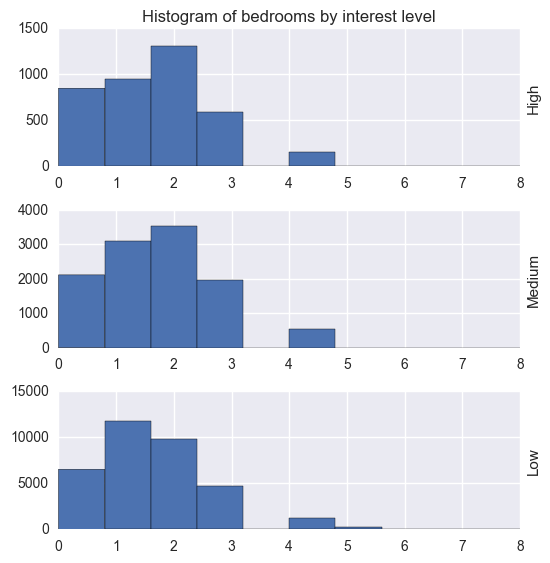

In [13]:
# Plot histograms of number of bedrooms by interest level, to see if there's a meaningful difference
plot_hist_by_interest('bedrooms')

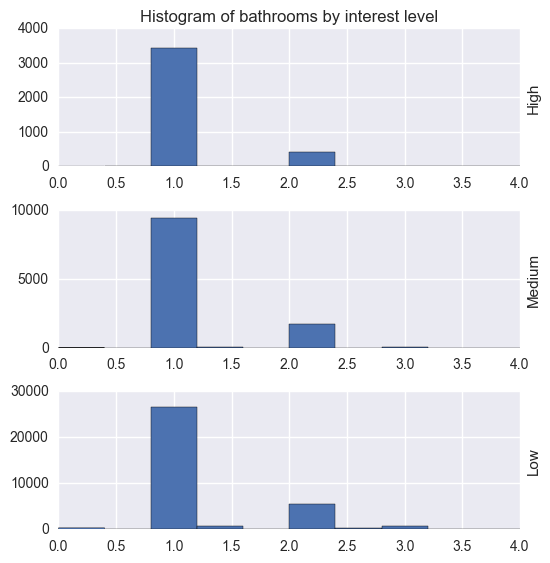

In [14]:
# Histograms of bathrooms...
plot_hist_by_interest('bathrooms', 0, 4)

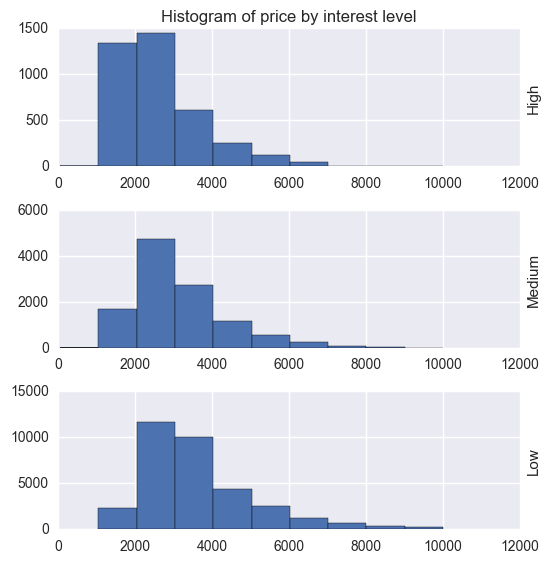

In [15]:
# Histograms of price...
plot_hist_by_interest('price', 0, 10000)

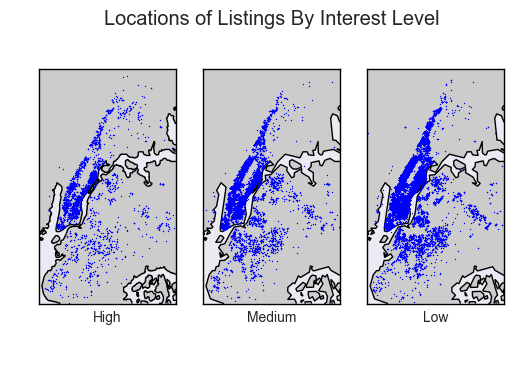

In [24]:
fig = plt.figure()
plt.axis('off')
plt.title('Locations of Listings By Interest Level', size='x-large')

ax1 = fig.add_subplot(131)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'f', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_high.longitude.values
lats = X_high.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=1)
ax1.set_xlabel('High', size='medium')


ax2 = fig.add_subplot(132)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_med.longitude.values
lats = X_med.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=1)
ax2.set_xlabel('Medium', size='medium')


ax3 = fig.add_subplot(133)
my_map = Basemap(projection='merc', lat_0 = -73.9, lon_0 = 40.8,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-74.05, llcrnrlat=40.6,
    urcrnrlon=-73.8, urcrnrlat=40.925)
my_map.drawcoastlines()
my_map.fillcontinents()
my_map.drawmapboundary()
lons = X_low.longitude.values
lats = X_low.latitude.values
x,y = my_map(lons, lats)
my_map.plot(x, y, 'bo', markersize=1)
ax3.set_xlabel('Low', size='medium')

plt.show()

# Basic Feature Engineering

### Number of Features Included in Listing

In [17]:
X_train['n_features'] = X_train['features'].apply(lambda x : len(x))
X_low, y_low, X_med, y_med, X_high, y_high = separate_by_interest(X_train, y_train)

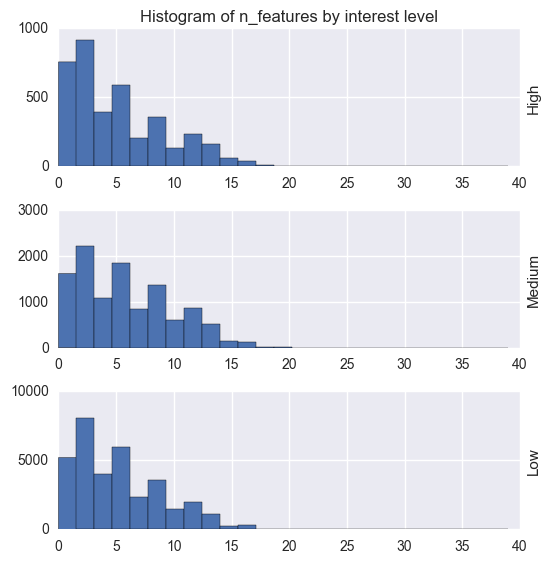

In [18]:
# Plot histogram of number of features of listing by interest level to see if there's a meaningful difference
plot_hist_by_interest('n_features', nbins=25)

##### Note: seems like sheer number of features included in listing doesn't tell us much

### Set of Unique Features

In [26]:
features_set = set().union(*X_train.features.values)

In [28]:
len(features_set)

1556

In [31]:
list(features_set)[:25]

[u'Updated Kitchen and Bathroom',
 u'Gym Fitness Lounge Swimming Pool Sun Decks Exercise Studios Indoor Half-Basketball Court',
 u'Gas&Electric included',
 u'private-outdoor-space',
 u'Great Natural Light',
 u'Super On Site',
 u'Vaulted Ceilings',
 u'custom lighting',
 u'Diswasher',
 u'Brand Newm Outdoor Deck',
 u'STAINLESS STEEL',
 u'central air',
 u'Central Park 1/2 block away!',
 u'** HOLY DEAL BATMAN! * ENTIRE FLOOR! * MASSIVE 4BR MANSION * GOURMET KITCHEN * PETS OK **',
 u'** PRISTINE PREWAR GEM! * MASSIVE 3BR SUPER SHARE * GUT RENOVATED * CHEF;S KITCHEN * ELEV BLDG * PETS OK **',
 u'2nd Ave',
 u'Sun Drenched',
 u'Pets: Case by case',
 u'fireplace',
 u'must see',
 u'** PRISTINE PARK AVE S LOFT! * MASSIVE 3BR MANSION * WALLS OF WINDOWS * CHEF INSPIRED KITCHEN * ELEV BLDG **',
 u'Sun deck',
 u'Doorman',
 u'laundry in building',
 u'amazing detail']

##### Note: Gut says there may be value to be found in doing basic NLP on features; e.g. I would suspect all caps indicate a lower-interest listing.

### Relative Frequencies of Most Common Features

In [90]:
# Create list of features, and create counters for 
feat_ctr = Counter(itertools.chain.from_iterable(X_train.features.values))
high_int_feat_ctr = Counter(itertools.chain.from_iterable(X_high.features.values))   
med_int_feat_ctr = Counter(itertools.chain.from_iterable(X_med.features.values))
low_int_feat_ctr = Counter(itertools.chain.from_iterable(X_low.features.values))

In [127]:
# Create list of most common features, and list of frequences for each interest level
most_common_features = map(lambda x : x[0], feat_ctr.most_common(15))
high_int_freq = map(lambda x : float(high_int_feat_ctr[x])/sum(high_int_feat_ctr.values), most_common_features)
med_int_freq = map(lambda x : float(med_int_feat_ctr[x])/sum(med_int_feat_ctr.values), most_common_features)
low_int_freq = map(lambda x : float(low_int_feat_ctr[x])/sum(low_int_feat_ctr.values), most_common_features)

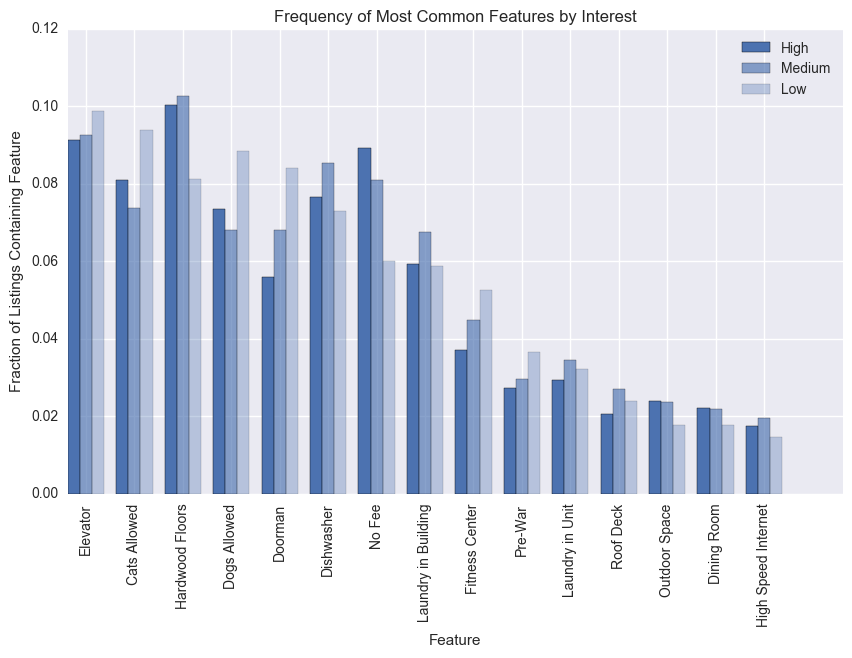

In [129]:
# Plot frequencies of most common features, by interest level
ind = np.arange(15)
width = 0.25
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Frequency of Most Common Features by Interest')
high = ax.bar(ind, high_int_freq, width, label='High')
med = ax.bar(ind+width, med_int_freq, width, alpha=0.66, label='Medium')
low = ax.bar(ind+2*width, low_int_freq, width, alpha=0.33, label='Low')
ax.set_ylabel('Fraction of Listings Containing Feature')
ax.set_xticks(ind+1.5*width)
ax.set_xticklabels(most_common_features, rotation=90)
ax.set_xlabel('Feature')
ax.legend()
plt.show();

##### Again, seems like not much to find here... No clear indicators of any particular interest level